# Data Wrangling & Data Analysis - Covid Data

##  Bronze Layer - Dataset loading 

In [1]:
import pyspark
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession

In [18]:
spark = SparkSession.builder.appName('Practise').getOrCreate()
spark

In [19]:
#Loading Dataset into Dataframes
df_states_current = pd.read_csv('states_current.csv')
df_states_daily = pd.read_csv('states_daily.csv')
df_states_info = pd.read_csv('states_info.csv')
df_states_screenshots = pd.read_csv('states_screenshots.csv')
df_us_current = pd.read_csv('us_current.csv')
df_us_daily = pd.read_csv('us_daily.csv')

# Silver Layer - Data cleaning

## Preparing df_states_current

In [20]:
df_states_current.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886,NaN,NaN,NaN,totalTestsViral,1731628,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818,69092.0,2480716.0,NaN,totalTestsViral,2736442,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0,NaN,2140.0,NaN,totalTestsViral,2140,NaN,NaN,...,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,20210307,AZ,826454,56519.0,3073010.0,NaN,totalTestsViral,7908105,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


In [21]:
df_states_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         56 non-null     int64  
 1   state                        56 non-null     object 
 2   positive                     56 non-null     int64  
 3   probableCases                36 non-null     float64
 4   negative                     35 non-null     float64
 5   pending                      5 non-null      float64
 6   totalTestResultsSource       56 non-null     object 
 7   totalTestResults             56 non-null     int64  
 8   hospitalizedCurrently        53 non-null     float64
 9   hospitalizedCumulative       38 non-null     float64
 10  inIcuCurrently               42 non-null     float64
 11  inIcuCumulative              12 non-null     float64
 12  onVentilatorCurrently        32 non-null     float64
 13  onVentilatorCumulative

In [22]:
#Check for commercialScore	negativeRegularScore	negativeScore	positiveScore	score	grade
df_states_current.grade.unique()

array([nan])

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

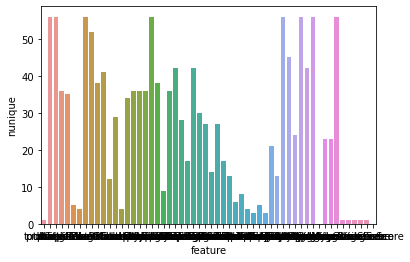

In [24]:
# Get Unique values of column
nu = df_states_current.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

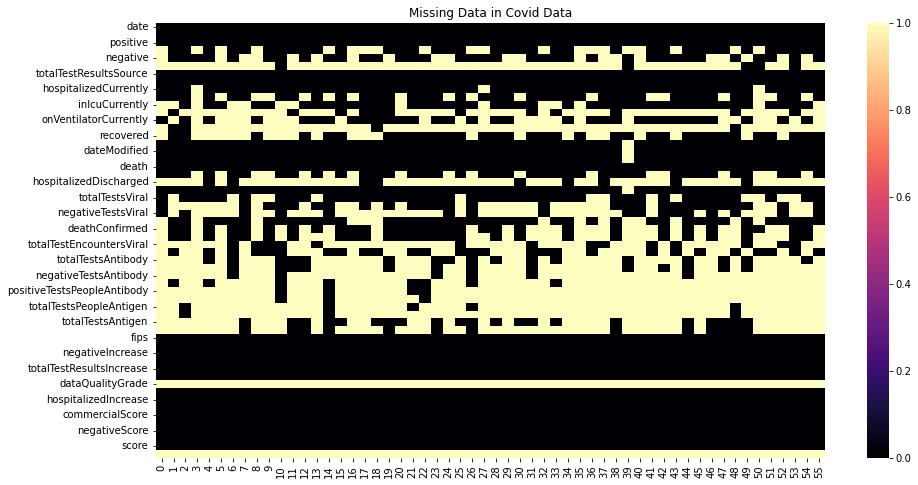

In [25]:
plt.subplots(figsize=(15,8))  
sns.heatmap(df_states_current.isnull().transpose(), cmap = 'magma')
plt.title("Missing Data in Covid Data")
plt.show()

In [26]:
#pip install missingno

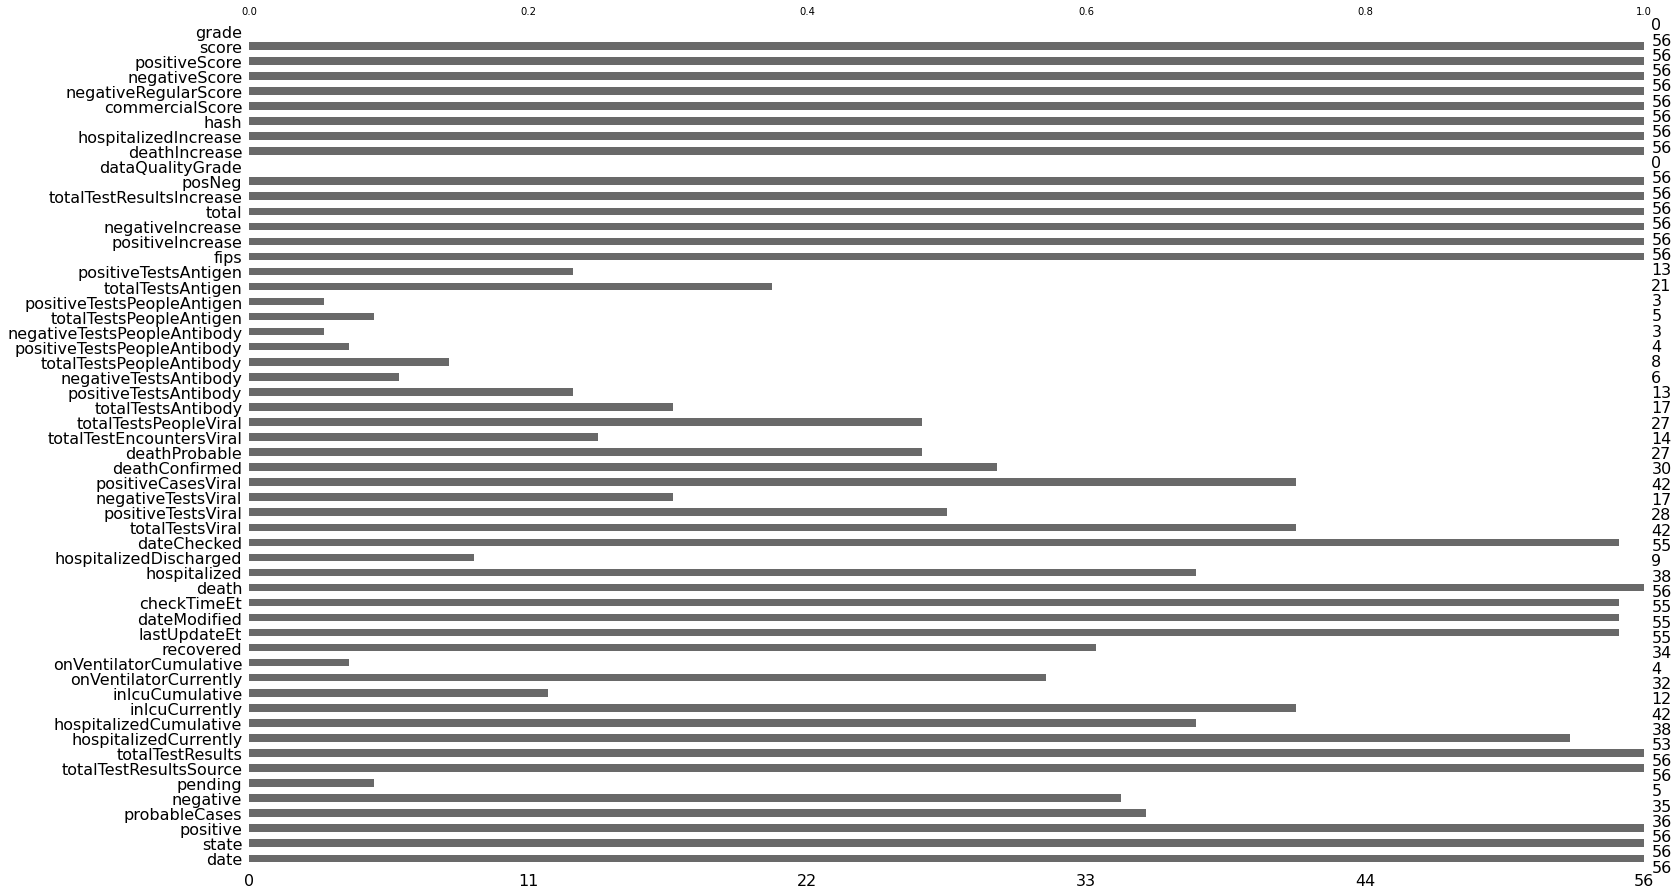

In [27]:
# no of values present in each column
import missingno as mi
mi.bar(df_states_current)
plt.show()

In [28]:
# Conclusion last 5 columns are having one values hence droping will reduce file size
# Also remove 2 column which are having 0 data
df_states_current = df_states_current.drop(columns =['grade', 'dataQualityGrade','score','positiveScore','negativeScore','negativeRegularScore','commercialScore'])

In [29]:
# Fill blank values with 0 with int value type
df_states_current = df_states_current.fillna('NA')
df_states_current.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash
0,20210307,AK,56886,NA,NA,NA,totalTestsViral,1731628,33.0,1293.0,...,NA,2,0,0,56886,0,56886,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164
1,20210307,AL,499819,107742.0,1931711.0,NA,totalTestsPeopleViral,2323788,494.0,45976.0,...,NA,1,408,2087,2431530,2347,2431530,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e
2,20210307,AR,324818,69092.0,2480716.0,NA,totalTestsViral,2736442,335.0,14926.0,...,NA,5,165,3267,2805534,3380,2805534,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae
3,20210307,AS,0,NA,2140.0,NA,totalTestsViral,2140,NA,NA,...,NA,60,0,0,2140,0,2140,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff
4,20210307,AZ,826454,56519.0,3073010.0,NA,totalTestsViral,7908105,963.0,57907.0,...,NA,4,1335,13678,3899464,45110,3899464,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf


# Preparing df_states_daily

In [30]:
df_states_daily.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,NaN,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,NaN
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,NaN,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,NaN
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,NaN,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,NaN
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,NaN,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0,0,0,0,0,NaN
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,NaN,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,NaN


In [31]:
df_states_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20584 non-null  float64
 3   probableCases                9218 non-null   float64
 4   negative                     13274 non-null  float64
 5   pending                      2139 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17338 non-null  float64
 9   hospitalizedCumulative       12891 non-null  float64
 10  inIcuCurrently               11534 non-null  float64
 11  inIcuCumulative              3792 non-null   float64
 12  onVentilatorCurrently        9122 non-null   float64
 13  onVentilatorCumu

In [32]:
#Check for Unique dates
df_states_daily.date.unique()

array([20210307, 20210306, 20210305, 20210304, 20210303, 20210302,
       20210301, 20210228, 20210227, 20210226, 20210225, 20210224,
       20210223, 20210222, 20210221, 20210220, 20210219, 20210218,
       20210217, 20210216, 20210215, 20210214, 20210213, 20210212,
       20210211, 20210210, 20210209, 20210208, 20210207, 20210206,
       20210205, 20210204, 20210203, 20210202, 20210201, 20210131,
       20210130, 20210129, 20210128, 20210127, 20210126, 20210125,
       20210124, 20210123, 20210122, 20210121, 20210120, 20210119,
       20210118, 20210117, 20210116, 20210115, 20210114, 20210113,
       20210112, 20210111, 20210110, 20210109, 20210108, 20210107,
       20210106, 20210105, 20210104, 20210103, 20210102, 20210101,
       20201231, 20201230, 20201229, 20201228, 20201227, 20201226,
       20201225, 20201224, 20201223, 20201222, 20201221, 20201220,
       20201219, 20201218, 20201217, 20201216, 20201215, 20201214,
       20201213, 20201212, 20201211, 20201210, 20201209, 20201

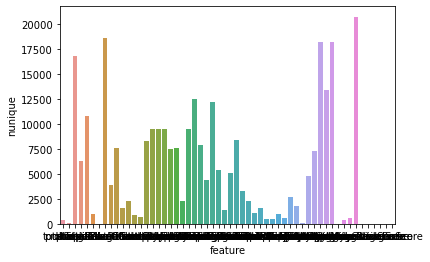

In [33]:
# Get Unique values of column
nu = df_states_daily.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
# Notice last columns are not unique 

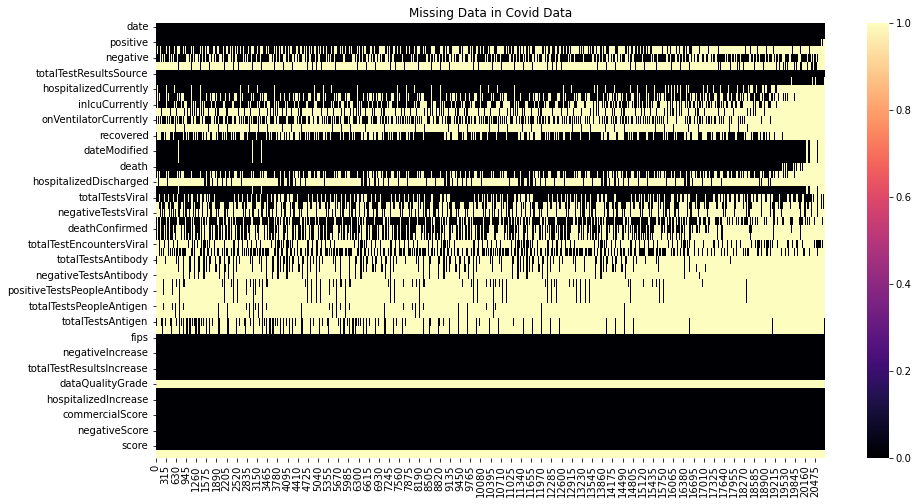

In [34]:
plt.subplots(figsize=(15,8))  
sns.heatmap(df_states_daily.isnull().transpose(), cmap = 'magma')
plt.title("Missing Data in Covid Data")
plt.show()

In [35]:
# Conclusion last 5 columns are having one values hence droping will reduce file size
# Also remove 2 column which are having 0 data
df_states_daily = df_states_daily.drop(columns =['grade', 'dataQualityGrade','score','positiveScore','negativeScore','negativeRegularScore','commercialScore'])

In [36]:
# Fill blank values with 0 with int value type
df_states_daily = df_states_daily.fillna(0)
df_states_daily.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash
0,20210307,AK,56886.0,0.0,0.0,0.0,totalTestsViral,1731628.0,33.0,1293.0,...,0.0,2,0,0,56886,0,56886,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164
1,20210307,AL,499819.0,107742.0,1931711.0,0.0,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,0.0,1,408,2087,2431530,2347,2431530,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e
2,20210307,AR,324818.0,69092.0,2480716.0,0.0,totalTestsViral,2736442.0,335.0,14926.0,...,0.0,5,165,3267,2805534,3380,2805534,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae
3,20210307,AS,0.0,0.0,2140.0,0.0,totalTestsViral,2140.0,0.0,0.0,...,0.0,60,0,0,2140,0,2140,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff
4,20210307,AZ,826454.0,56519.0,3073010.0,0.0,totalTestsViral,7908105.0,963.0,57907.0,...,0.0,4,1335,13678,3899464,45110,3899464,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf


## Preparing df_states_info

In [37]:
df_states_info.head()

,state,notes,covid19Site,covid19SiteSecondary,covid19SiteTertiary,covid19SiteQuaternary,covid19SiteQuinary,twitter,covid19SiteOld,covidTrackingProjectPreferredTotalTestUnits,covidTrackingProjectPreferredTotalTestField,totalTestResultsField,pui,pum,name,fips
0,AK,Alaska combines PCR and antigen tests in the t...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,https://experience.arcgis.com/experience/ed1c8...,https://alaska-dhss.maps.arcgis.com/apps/opsda...,https://services1.arcgis.com/WzFsmainVTuD5KML/...,https://services1.arcgis.com/WzFsmainVTuD5KML/...,@Alaska_DHSS,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,Specimens,totalTestsViral,Total Tests (PCR),All data,False,Alaska,2
1,AL,Alabama combines PCR and antigen tests in the ...,https://alpublichealth.maps.arcgis.com/apps/op...,https://alpublichealth.maps.arcgis.com/apps/op...,https://services7.arcgis.com/4RQmZZ0yaZkGR1zy/...,NaN,NaN,@alpublichealth,http://www.alabamapublichealth.gov/infectiousd...,People,totalTestsPeopleViral,Total PCR Tests (People),No data,False,Alabama,1
2,AR,Arkansas reports a category of “non-COVID deat...,https://www.healthy.arkansas.gov/programs-serv...,https://experience.arcgis.com/experience/c2ef4...,https://adem.maps.arcgis.com/apps/opsdashboard...,https://adem.maps.arcgis.com/apps/opsdashboard...,https://adem.maps.arcgis.com/apps/opsdashboard...,@adhpio,https://www.healthy.arkansas.gov/programs-serv...,Specimens,totalTestsViral,Total Tests (PCR),All data,False,Arkansas,5
3,AS,American Samoa does not have a regularly updat...,https://www.americansamoa.gov/covid-19-advisories,https://www.facebook.com/amsamgov/,NaN,NaN,NaN,NaN,http://www.samoagovt.ws/2020/03/ministry-of-he...,Specimens,totalTestsViral,Total Tests (PCR),No Data,False,American Samoa,60
4,AZ,Arizona combines PCR and antigen tests in the ...,https://www.azdhs.gov/preparedness/epidemiolog...,https://tableau.azdhs.gov/views/Hospitalizatio...,https://tableau.azdhs.gov/views/ExternalEMReso...,https://tableau.azdhs.gov/views/ExternalEMReso...,https://www.azdhs.gov/preparedness/epidemiolog...,@azdhs,https://www.azdhs.gov/preparedness/epidemiolog...,Specimens,totalTestsViral,Total Tests (PCR),All data,False,Arizona,4


In [38]:
df_states_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   state                                        56 non-null     object
 1   notes                                        56 non-null     object
 2   covid19Site                                  56 non-null     object
 3   covid19SiteSecondary                         51 non-null     object
 4   covid19SiteTertiary                          41 non-null     object
 5   covid19SiteQuaternary                        27 non-null     object
 6   covid19SiteQuinary                           13 non-null     object
 7   twitter                                      55 non-null     object
 8   covid19SiteOld                               56 non-null     object
 9   covidTrackingProjectPreferredTotalTestUnits  56 non-null     object
 10  covidTrackingPro

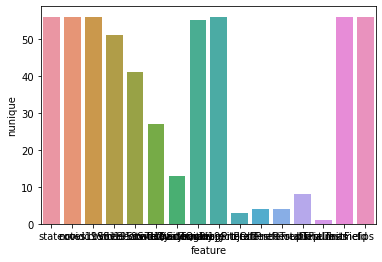

In [39]:
# Get Unique values of column
nu = df_states_info.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

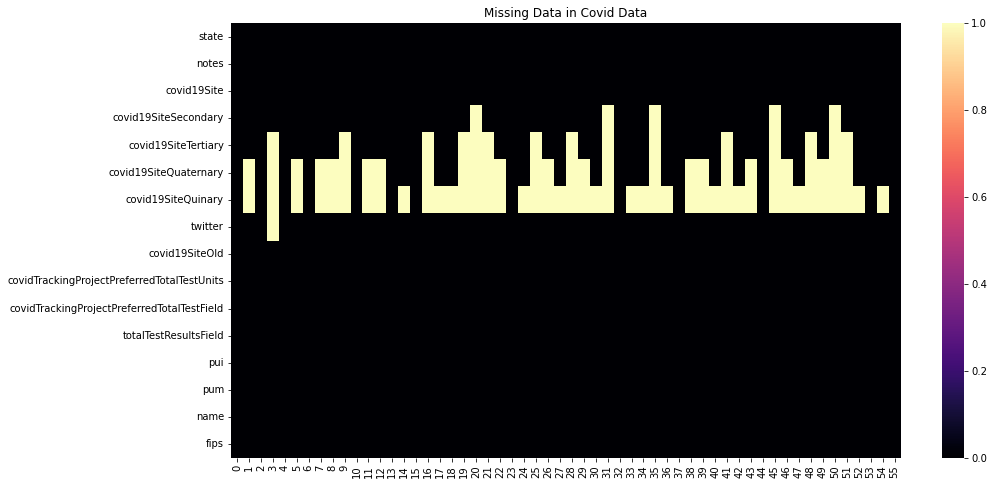

In [40]:
plt.subplots(figsize=(15,8))  
sns.heatmap(df_states_info.isnull().transpose(), cmap = 'magma')
plt.title("Missing Data in Covid Data")
plt.show()

In [41]:
# Fill blank values with 0 with int value type
df_states_info = df_states_info.fillna('NA')

In [42]:
df_states_info.head()

,state,notes,covid19Site,covid19SiteSecondary,covid19SiteTertiary,covid19SiteQuaternary,covid19SiteQuinary,twitter,covid19SiteOld,covidTrackingProjectPreferredTotalTestUnits,covidTrackingProjectPreferredTotalTestField,totalTestResultsField,pui,pum,name,fips
0,AK,Alaska combines PCR and antigen tests in the t...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,https://experience.arcgis.com/experience/ed1c8...,https://alaska-dhss.maps.arcgis.com/apps/opsda...,https://services1.arcgis.com/WzFsmainVTuD5KML/...,https://services1.arcgis.com/WzFsmainVTuD5KML/...,@Alaska_DHSS,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,Specimens,totalTestsViral,Total Tests (PCR),All data,False,Alaska,2
1,AL,Alabama combines PCR and antigen tests in the ...,https://alpublichealth.maps.arcgis.com/apps/op...,https://alpublichealth.maps.arcgis.com/apps/op...,https://services7.arcgis.com/4RQmZZ0yaZkGR1zy/...,NA,NA,@alpublichealth,http://www.alabamapublichealth.gov/infectiousd...,People,totalTestsPeopleViral,Total PCR Tests (People),No data,False,Alabama,1
2,AR,Arkansas reports a category of “non-COVID deat...,https://www.healthy.arkansas.gov/programs-serv...,https://experience.arcgis.com/experience/c2ef4...,https://adem.maps.arcgis.com/apps/opsdashboard...,https://adem.maps.arcgis.com/apps/opsdashboard...,https://adem.maps.arcgis.com/apps/opsdashboard...,@adhpio,https://www.healthy.arkansas.gov/programs-serv...,Specimens,totalTestsViral,Total Tests (PCR),All data,False,Arkansas,5
3,AS,American Samoa does not have a regularly updat...,https://www.americansamoa.gov/covid-19-advisories,https://www.facebook.com/amsamgov/,NA,NA,NA,NA,http://www.samoagovt.ws/2020/03/ministry-of-he...,Specimens,totalTestsViral,Total Tests (PCR),No Data,False,American Samoa,60
4,AZ,Arizona combines PCR and antigen tests in the ...,https://www.azdhs.gov/preparedness/epidemiolog...,https://tableau.azdhs.gov/views/Hospitalizatio...,https://tableau.azdhs.gov/views/ExternalEMReso...,https://tableau.azdhs.gov/views/ExternalEMReso...,https://www.azdhs.gov/preparedness/epidemiolog...,@azdhs,https://www.azdhs.gov/preparedness/epidemiolog...,Specimens,totalTestsViral,Total Tests (PCR),All data,False,Arizona,4


## Preparing df_states_screenshots

In [43]:
df_states_screenshots.head()

,state,url,secondary,tertiary,dateChecked,date,size
0,AK,https://covidtracking.com/screenshots/AK/AK-20...,False,False,2020-03-15T06:13:15.000Z,20200315,563460
1,AK,https://covidtracking.com/screenshots/AK/AK-20...,False,False,2020-03-15T20:32:25.000Z,20200315,432003
2,AK,https://covidtracking.com/screenshots/AK/AK-20...,False,False,2020-03-16T14:53:36.000Z,20200316,563460
3,AK,https://covidtracking.com/screenshots/AK/AK-20...,False,False,2020-03-17T03:06:10.000Z,20200317,563522
4,AK,https://covidtracking.com/screenshots/AK/AK-20...,False,False,2020-03-17T18:09:31.000Z,20200317,567852


In [44]:
df_states_screenshots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67106 entries, 0 to 67105
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        67106 non-null  object
 1   url          67106 non-null  object
 2   secondary    67106 non-null  bool  
 3   tertiary     67106 non-null  bool  
 4   dateChecked  67106 non-null  object
 5   date         67106 non-null  int64 
 6   size         67106 non-null  int64 
dtypes: bool(2), int64(2), object(3)
memory usage: 2.7+ MB


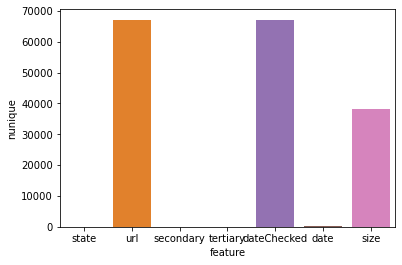

In [45]:
# Get Unique values of column
nu = df_states_screenshots.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [46]:
#Check for Unique State
df_states_screenshots.state.unique()

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

In [47]:
# Not deleting any column as date and hourly both analysis can be done
# Didn't understand logic of secondary tertiary column

## Preparing df_us_current

In [48]:
df_us_current.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28755524,74579770,11808,40212,878613,8137,45475,2801,...,2021-03-07T24:00:00Z,NaN,0,0,839,726,130414,41265,1156241,8b26839690cd05c0cef69cb9ed85641a76b5e78e


## Preparing df_us_daily

In [49]:
df_us_daily.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28755524.0,74579770.0,11808.0,40212.0,878613.0,8137.0,45475.0,2801.0,...,2021-03-07T24:00:00Z,NaN,0,0,839,726,130414,41265,1156241,8b26839690cd05c0cef69cb9ed85641a76b5e78e
1,20210306,56,28714259.0,74449356.0,11783.0,41401.0,877887.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1674,503,142201,59620,1409138,d0c0482ea549c9d5c04a7c86acb6fc6a8095a592
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,877384.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,a35ea4289cec4bb55c9f29ae04ec0fd5ac4e0222
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,874603.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,a19ad6379a653834cbda3093791ad2c3b9fab5ff
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,873073.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,9e1d2afda1b0ec243060d6f68a7134d011c0cb2a


In [50]:
df_us_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

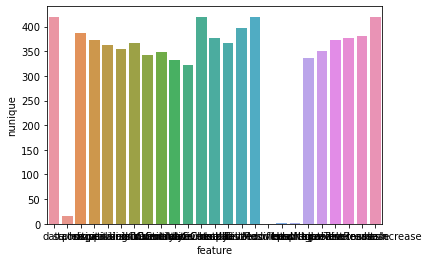

In [51]:
# Get Unique values of column
nu = df_us_daily.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [52]:
#Explore 3 columns as they don't hve any unique value : recovered	total	posNeg

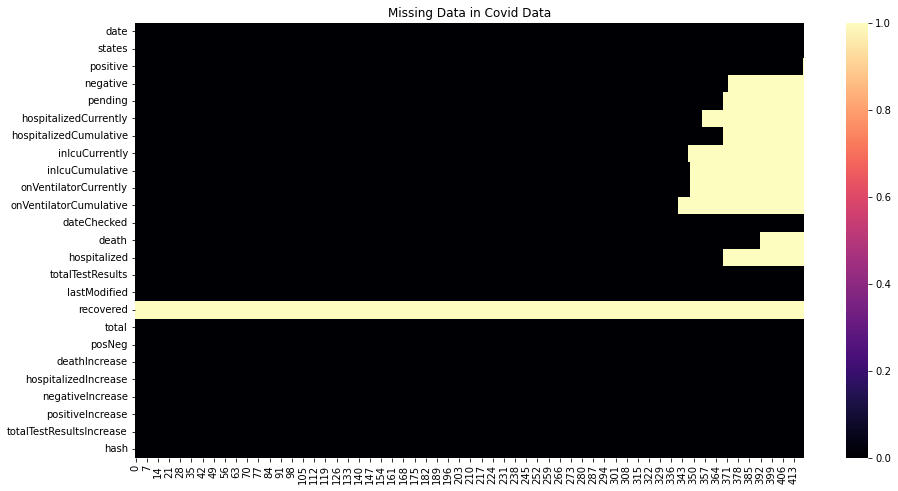

In [53]:
plt.subplots(figsize=(15,8))  
sns.heatmap(df_us_daily.isnull().transpose(), cmap = 'magma')
plt.title("Missing Data in Covid Data")
plt.show()

In [54]:
df_us_daily = df_us_daily.drop(columns =['recovered','total','posNeg'])

In [55]:
df_us_daily.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,totalTestResults,lastModified,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28755524.0,74579770.0,11808.0,40212.0,878613.0,8137.0,45475.0,2801.0,...,515142.0,878613.0,363789451,2021-03-07T24:00:00Z,839,726,130414,41265,1156241,8b26839690cd05c0cef69cb9ed85641a76b5e78e
1,20210306,56,28714259.0,74449356.0,11783.0,41401.0,877887.0,8409.0,45453.0,2811.0,...,514303.0,877887.0,362633210,2021-03-06T24:00:00Z,1674,503,142201,59620,1409138,d0c0482ea549c9d5c04a7c86acb6fc6a8095a592
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,877384.0,8634.0,45373.0,2889.0,...,512629.0,877384.0,361224072,2021-03-05T24:00:00Z,2221,2781,271917,68787,1744417,a35ea4289cec4bb55c9f29ae04ec0fd5ac4e0222
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,874603.0,8970.0,45293.0,2973.0,...,510408.0,874603.0,359479655,2021-03-04T24:00:00Z,1743,1530,177957,65487,1590984,a19ad6379a653834cbda3093791ad2c3b9fab5ff
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,873073.0,9359.0,45214.0,3094.0,...,508665.0,873073.0,357888671,2021-03-03T24:00:00Z,2449,2172,267001,66836,1406795,9e1d2afda1b0ec243060d6f68a7134d011c0cb2a


In [56]:
pip install jupyter_nbextensions_configurator

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install -e jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.


ERROR: jupyter_contrib_nbextensions is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).


In [59]:
jupyter contrib nbextension install --user

SyntaxError: invalid syntax (1639211862.py, line 1)

# Gold Layer - Analysis 

In [78]:
# Analysing df_states_current
df_states_current_withoutNA = df_states_current.dropna(how='all')
df_states_current_withoutNA.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash
0,20210307,AK,56886,NA,NA,NA,totalTestsViral,1731628,33.0,1293.0,...,NA,2,0,0,56886,0,56886,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164
1,20210307,AL,499819,107742.0,1931711.0,NA,totalTestsPeopleViral,2323788,494.0,45976.0,...,NA,1,408,2087,2431530,2347,2431530,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e
2,20210307,AR,324818,69092.0,2480716.0,NA,totalTestsViral,2736442,335.0,14926.0,...,NA,5,165,3267,2805534,3380,2805534,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae
3,20210307,AS,0,NA,2140.0,NA,totalTestsViral,2140,NA,NA,...,NA,60,0,0,2140,0,2140,0,0,96d23f888c995b9a7f3b4b864de6414f45c728ff
4,20210307,AZ,826454,56519.0,3073010.0,NA,totalTestsViral,7908105,963.0,57907.0,...,NA,4,1335,13678,3899464,45110,3899464,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# Formatting date 
from datetime import datetime
# df_states_daily['date'] = (datetime.strptime(df_states_daily['date'],%Y%m%d).strftime('%d-%m-%Y'))
df_states_daily['date'].datetime.strftime('%d/%m/%y')

AttributeError: 'Series' object has no attribute 'datetime'

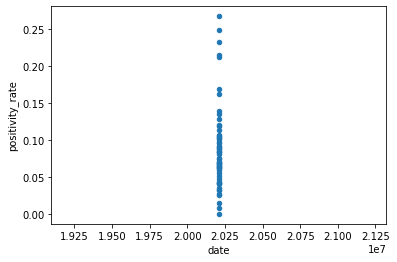

In [74]:
# Analysing df_states_current
# Positivity rate vs States
df_states_daily["positivity_rate"] = df_states_current["positive"]/df_states_current["totalTestResults"]
df_states_daily.plot.scatter(x = 'date', y = 'positivity_rate');

In [76]:
df_states_current_pivot = df_states_current.groupby(['date','state'])['positive','negative','totalTestResults','positivity_rate'].min()
df_states_current_pivot.style.background_gradient(cmap="cubehelix")

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

Text(0, 0.5, 'Positive cases')

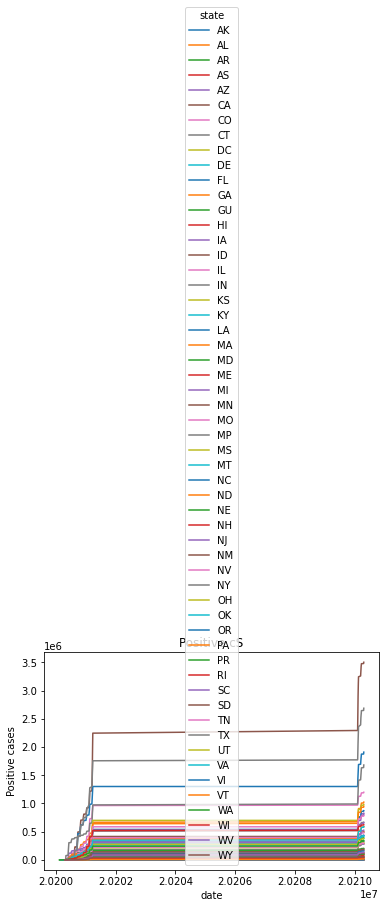

In [67]:
#    'positive','negative','totalTestResults'
plotdata = df_states_daily.pivot(index='date',columns='state', values='positive')
plotdata.plot(kind="line")
plt.title("Positive cS")
plt.xlabel("date")
plt.ylabel("Positive cases")

In [68]:
df_states_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20780 non-null  float64
 3   probableCases                20780 non-null  float64
 4   negative                     20780 non-null  float64
 5   pending                      20780 non-null  float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20780 non-null  float64
 8   hospitalizedCurrently        20780 non-null  float64
 9   hospitalizedCumulative       20780 non-null  float64
 10  inIcuCurrently               20780 non-null  float64
 11  inIcuCumulative              20780 non-null  float64
 12  onVentilatorCurrently        20780 non-null  float64
 13  onVentilatorCumu

In [69]:
top10_cases = df_states_daily.groupby(by='state').max()[['positive']].sort_values(by = ['positive'], ascending = False).reset_index()

TypeError: '>=' not supported between instances of 'str' and 'int'

NameError: name 'top10_cases' is not defined

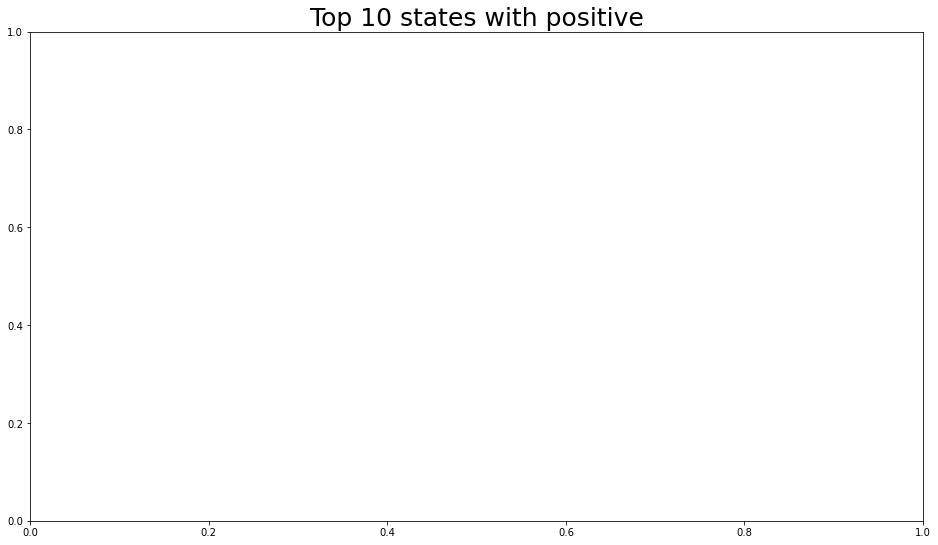

In [70]:
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 states with positive",size=25)
ax = sns.barplot(data = top10_cases.iloc[:5], y = "positive", x="state")
plt.xlabel("state")
plt.ylabel("Total postive Cases")
plt.show()

<AxesSubplot:xlabel='date', ylabel='positive'>

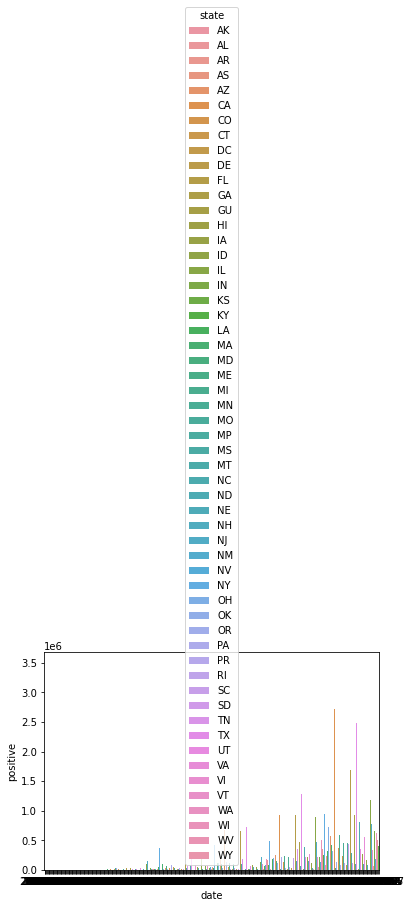

In [71]:
#No. of posotive cases line chart state by date
import seaborn as sns
sns.barplot(x='date', y='positive', hue='state', data=df_states_daily)

In [72]:
#Top 10 Deaths by state
top10_cases = df_states_daily.groupby(by='state').max()[['deathConfirmed']].sort_values(by = ['deathConfirmed'], ascending = False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 states with deaths",size=25)
ax = sns.barplot(data = top10_cases.iloc[:10], y = "deathConfirmed", x="state")
plt.xlabel("state")
plt.ylabel("Total Death Cases")
plt.show()

TypeError: '>=' not supported between instances of 'str' and 'int'

In [31]:
#Growth Trend
fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data = df_states_daily[df_states_daily['state'],isin(['AZ','IL']),x = 'date', y ='positive',hue='state'])
#ax.set_title("Top Affected States",size=16)

SyntaxError: invalid syntax (548500381.py, line 3)